In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Debu\\Downloads\\Admission_Predict.csv")
print(df.shape)
print(df.info())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Chance of Admit    400 non-null    float64
 8   Research           400 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


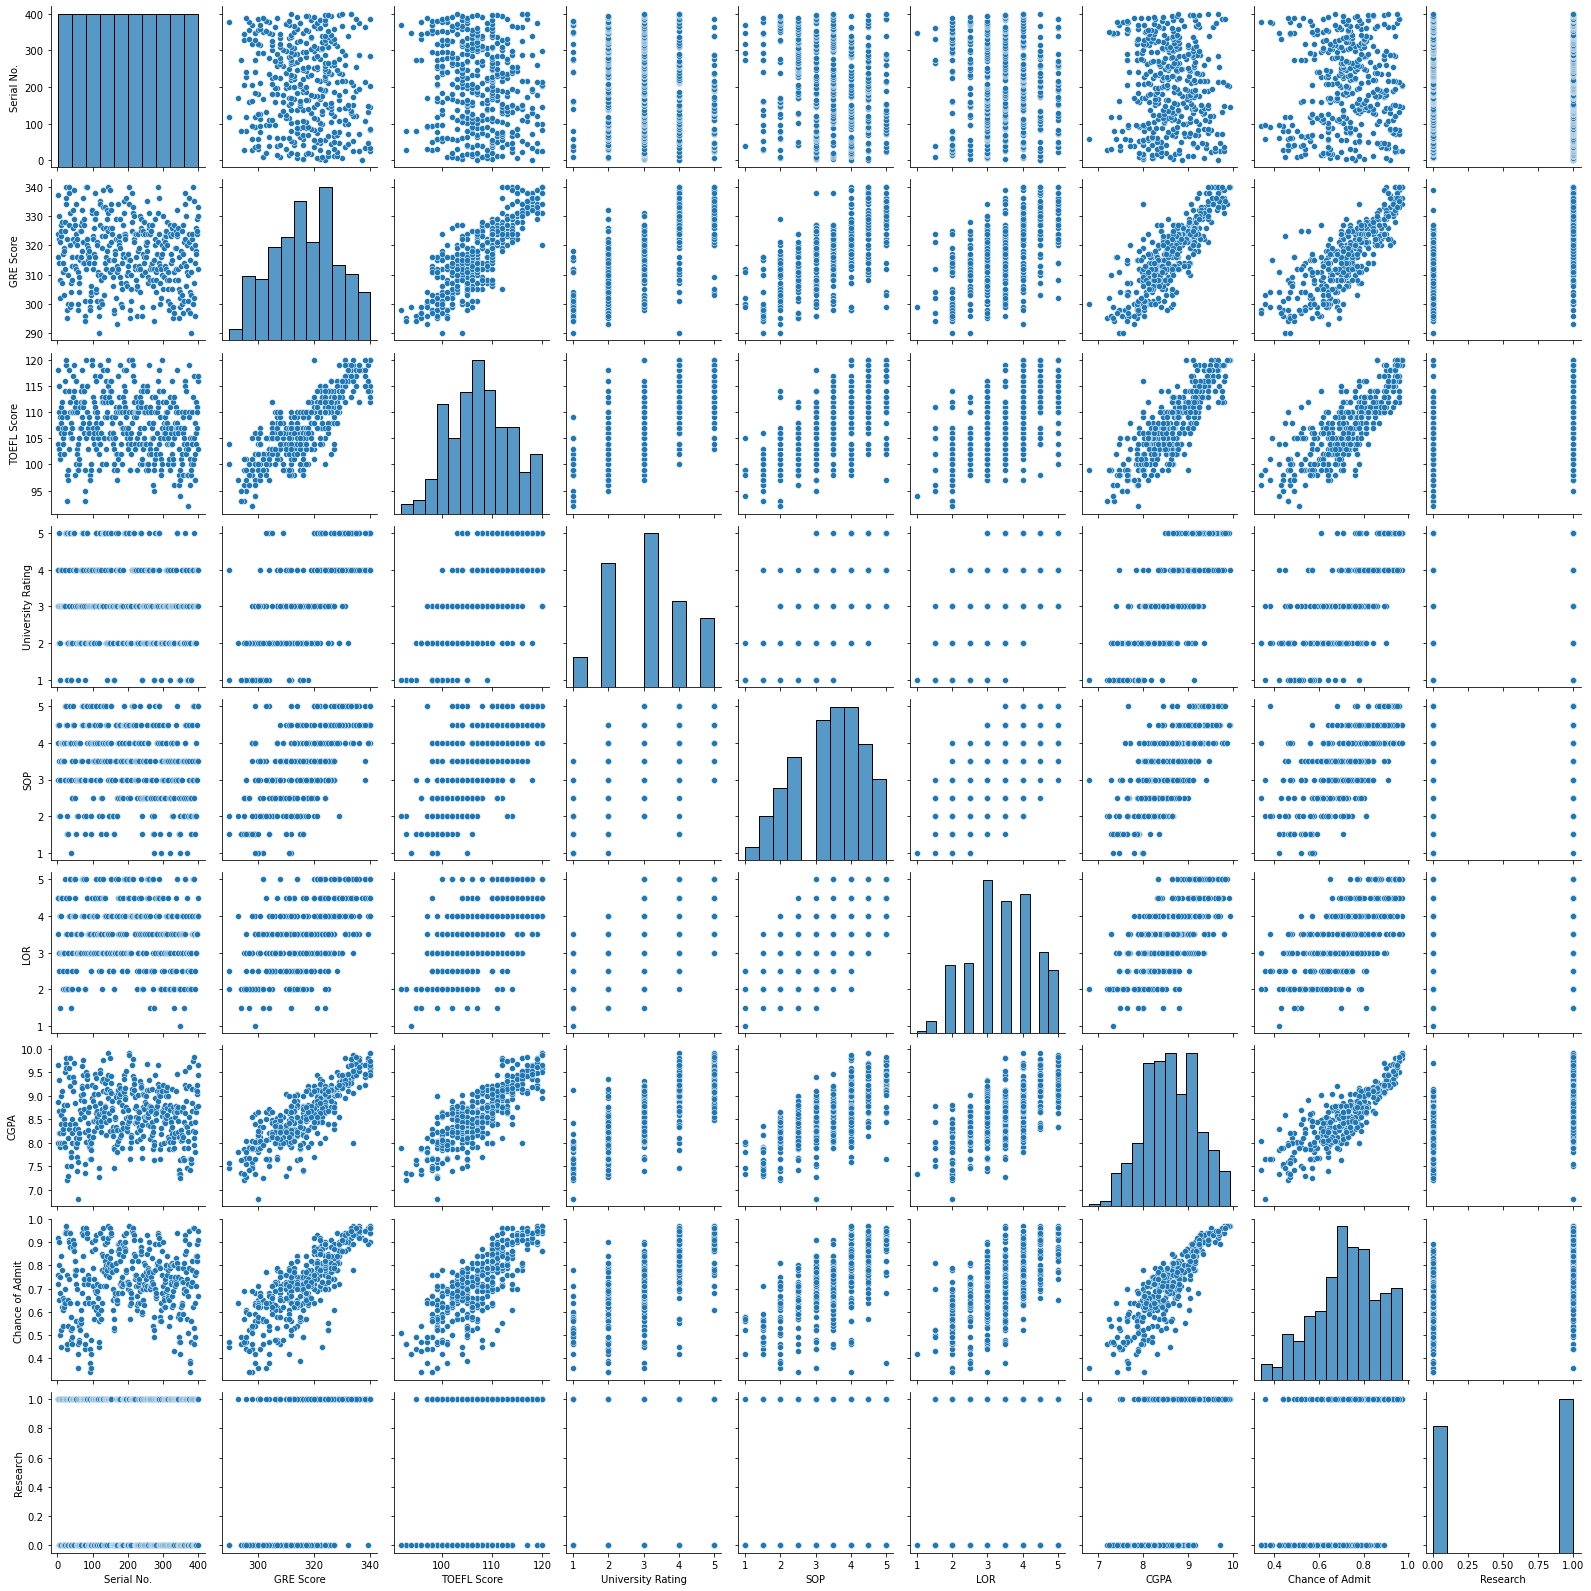

In [4]:
sb.pairplot(df)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP      LOR       CGPA  Chance of Admit   Research  
Serial No.        -0.166932 -0.088221 -0.045608          0.042336 -0.063138  
GRE Score          0.612831  0.557555  0.833060          0.802610  0.580391  
TOEFL

<AxesSubplot:>

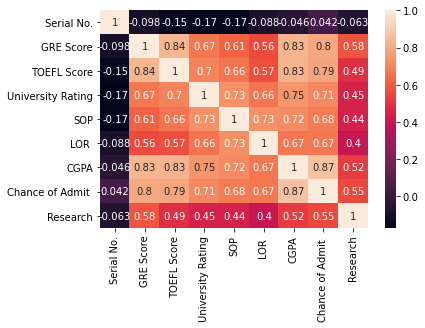

In [5]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Chance of Admit      0
Research             0
dtype: int64

In [8]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0


In [9]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
#print(df2)
train_x = (df2[:,0:6])
train_y = df2[:,7]
print(train_x)
print(train_y)

[[337.   118.     4.     4.5    4.5    9.65]
 [324.   107.     4.     4.     4.5    8.87]
 [316.   104.     3.     3.     3.5    8.  ]
 ...
 [330.   116.     4.     5.     4.5    9.45]
 [312.   103.     3.     3.5    4.     8.78]
 [333.   117.     4.     5.     4.     9.66]]
[1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       0.875      0.875      0.91346154]
 [0.68       0.53571429 0.75       0.75       0.875      0.66346154]
 [0.52       0.42857143 0.5        0.5        0.625      0.38461538]
 ...
 [0.8        0.85714286 0.75       1.         0.875      0.84935897]
 [0.44       0.39285714 0.5        0.625      0.75       0.63461538]
 [0.86       0.89285714 0.75       1.         0.75       0.91666667]]


In [11]:
regress.fit (train_x,train_y)
# The coefficients y= m0x0+m1x1+...m11x11+c
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[3.26740092 0.66611703 0.59315705 0.84433594 0.55397236 1.14777713]]
Intercept:  [-3.65843726]


In [12]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df

1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research,Pred
0,337,118,4,4.5,4.5,9.65,0.92,1,1.0
1,324,107,4,4.0,4.5,8.87,0.76,1,1.0
2,316,104,3,3.0,3.5,8.00,0.72,1,0.0
3,322,110,3,3.5,2.5,8.67,0.80,1,1.0
4,314,103,2,2.0,3.0,8.21,0.65,0,0.0
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82,1,1.0
396,325,107,3,3.0,3.5,9.11,0.84,1,1.0
397,330,116,4,5.0,4.5,9.45,0.91,1,1.0
398,312,103,3,3.5,4.0,8.78,0.67,0,1.0


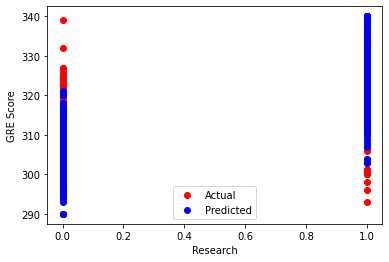

In [13]:
plt.scatter(df['Research'],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['Pred'],df['GRE Score'],color = 'blue',label = 'Predicted' )
plt.xlabel('Research')
plt.ylabel('GRE Score')
plt.legend()
plt.show()

In [14]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))

Accucary: 0.7725
Confusion Matrix
 [[132  49]
 [ 42 177]]


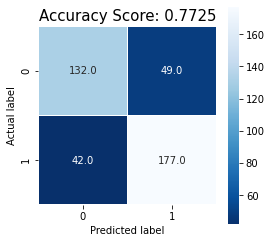

In [15]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);


In [16]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       181
         1.0       0.78      0.81      0.80       219

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400

